In [4]:
import geopandas as gpd
import pandas as pd
import time, calendar

In [5]:
polys = gpd.read_file("../shp/Russia_Regions_Shapefile.shp")
geojson_path = "../geolocated_datasets/1686574174-geolocated-@poisk_in_ua.json"
with open(geojson_path, encoding = "utf-8-sig") as geojson_file:
    points = gpd.read_file(geojson_file, driver ="GeoJSON")
    print(len(points))

13194


In [6]:
pointsInPolygon = gpd.sjoin(points, polys, how="right")

In [7]:
pointsInPolygon['count']=1
fatalities_per_region = pointsInPolygon.groupby('name_en').agg({'geometry':'first', 'count':'sum'}).reset_index()


,name_en,geometry,count
26,Krasnodar Krai,"POLYGON ((40.68873 43.51960, 40.64799 43.53391...",653
65,Sverdlovsk,"POLYGON ((59.48539 61.99327, 59.65189 61.93648...",579
4,Bashkortostan,"POLYGON ((53.63169 55.90669, 53.77742 55.97023...",518
8,Chelyabinsk,"POLYGON ((63.31913 54.17323, 63.29271 54.17044...",483
48,Republic of Buryatia,"POLYGON ((107.74445 49.96628, 107.63098 49.983...",460
44,Perm Krai,"POLYGON ((54.35248 56.35852, 54.24499 56.43185...",375
61,Samara,"POLYGON ((48.43697 52.78045, 48.53970 52.83026...",371
27,Krasnoyarsk Krai,"MULTIPOLYGON (((96.85391 76.19917, 96.79785 76...",363
80,Zabaykalsky Krai,"POLYGON ((116.68330 49.82378, 116.63157 49.877...",361
75,Volgograd,"POLYGON ((47.44663 50.36846, 47.42918 50.35796...",328


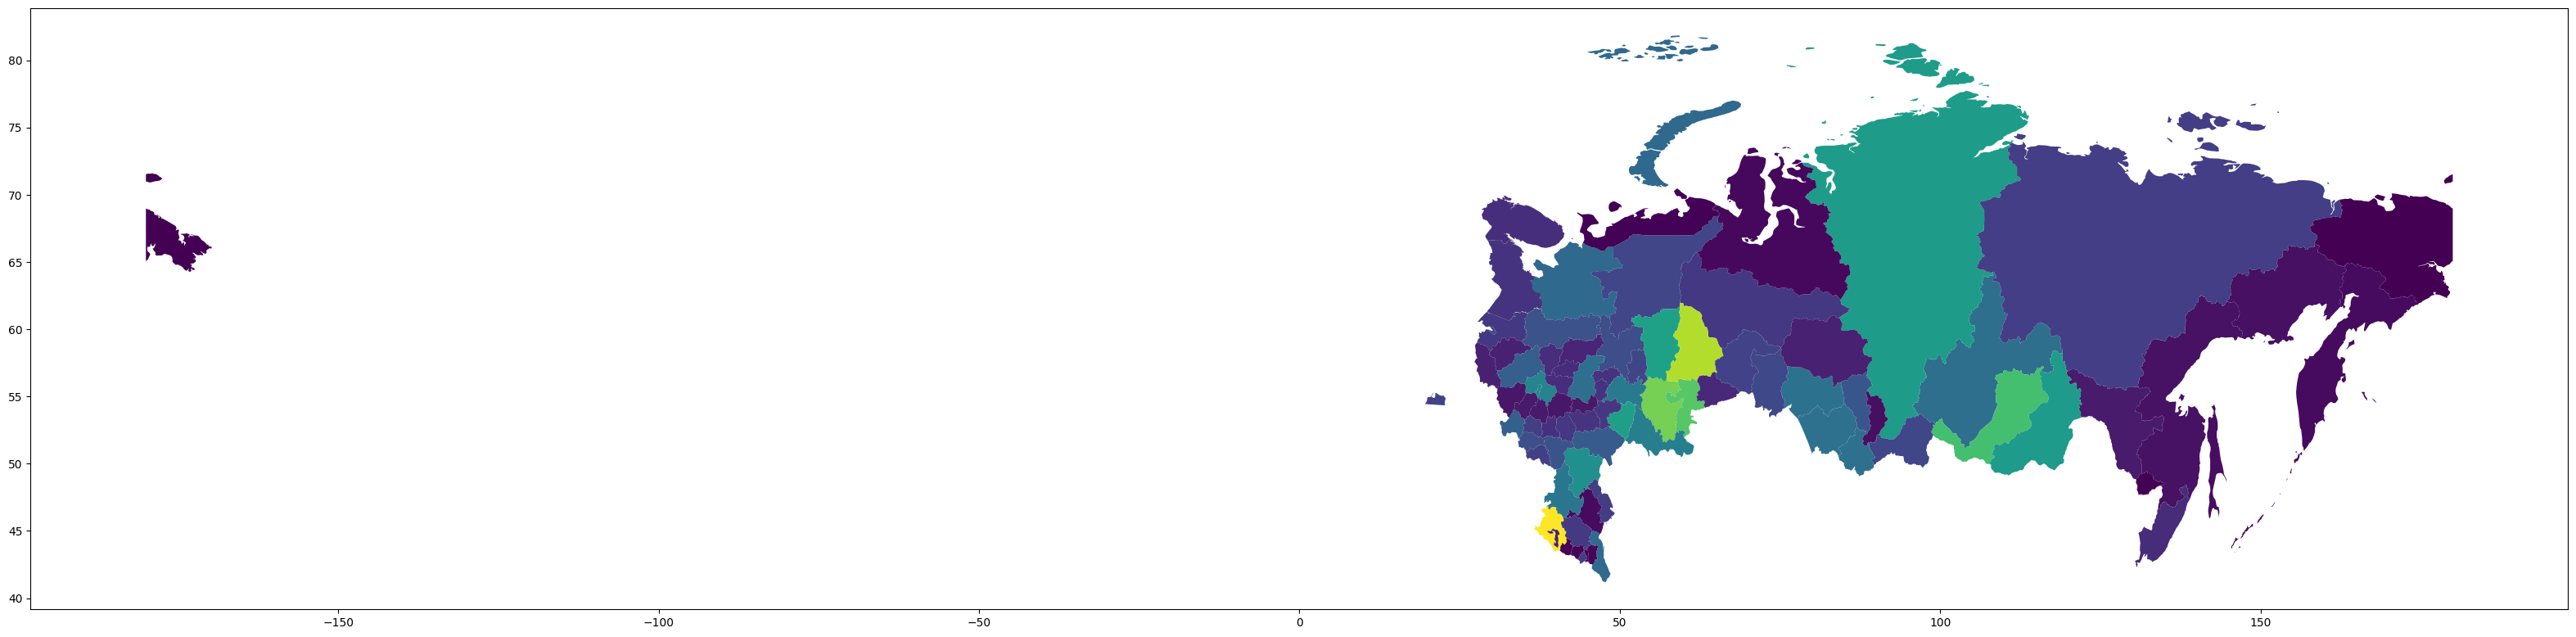

In [8]:
fatalities_per_region.set_geometry("geometry", crs = "EPSG:4326", inplace = True)
fatalities_per_region.plot(column="count", figsize=(40,10))
fatalities_per_region.sort_values(by="count" , ascending = False).head(15)

In [9]:
timestamp = calendar.timegm(time.gmtime())

fatalities_per_region_fn = f"../geolocated_datasets/{timestamp}-fatalities_per_region_Russia.json"
output_file = open(fatalities_per_region_fn, "w", encoding="utf-8-sig")
contents = fatalities_per_region.to_json()
output_file.write(contents)

2987825